In [61]:
import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
import graphviz

In [44]:
usData = pd.read_csv('../Data/Youtube/cleaned_us.csv')
usData.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966.0,2486.0,184.0,532.0,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053.0,4451.0,1772.0,895.0,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062.0,7250.0,217.0,456.0,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430.0,115426.0,1110.0,6541.0,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


In [45]:
usData.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
tags                       object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
category                   object
dtype: object

Qualitative Variables:  
video_id, title, channel_title, tags, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description, category


Quantitative Variables:  
views, likes, dislikes, comment_count, trending_date, publish_time

# Predictor Variable: Views

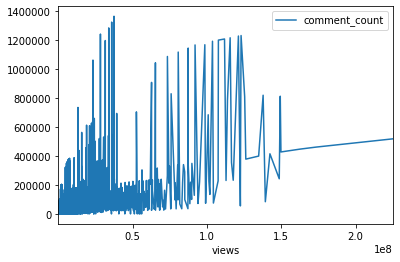

In [46]:
usData.sort_values('views').plot.line(x='views', y='comment_count')

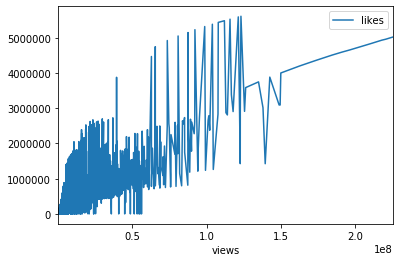

In [47]:
usData.sort_values('views').plot.line(x='views', y='likes')

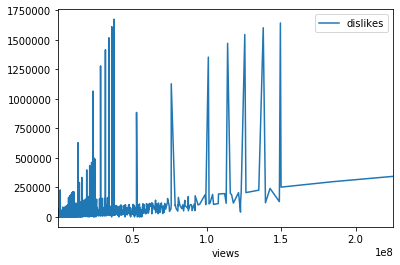

In [48]:
usData.sort_values('views').plot.line(x='views', y='dislikes')

In [49]:
usData['channel_title'] = usData['channel_title'].astype('category')
gp = usData.groupby('channel_title')
gp.ngroup()

0         335
1        1306
2        1573
3         713
4        1530
         ... 
41362     219
41363     219
41364     219
41365     219
41366     219
Length: 41367, dtype: int64

In [50]:
gp.describe()

views                                        \
                        count          mean           std       min   
channel_title                                                         
12 News                   2.0  8.898500e+04  4.726302e+03   85643.0   
1MILLION Dance Studio    33.0  6.351263e+05  2.178436e+05  210802.0   
1theK (원더케이)             19.0  3.019787e+06  2.519647e+06  788529.0   
20th Century Fox        134.0  7.962033e+06  6.563020e+06   63178.0   
2CELLOS                   2.0  2.160930e+05  1.445892e+04  205869.0   
...                       ...           ...           ...       ...   
ワーナー ブラザース 公式チャンネル        6.0  1.231554e+06  2.896082e+05  755014.0   
圧倒的不審者の極み!               12.0  9.514764e+05  3.509590e+05  294419.0   
杰威爾音樂 JVR Music          28.0  1.427194e+07  5.941846e+06  916128.0   
郭韋辰                       2.0  1.348200e+04  1.255822e+03   12594.0   
영국남자 Korean Englishman    6.0  9.939640e+05  2.273056e+05  588820.0   

                                                                        likes  \
                              25%         50%          75%         max  count   
channel_title                                                                   
12 News                   87314.0     88985.0     90656.00     92327.0    2.0   
1MILLION Dance Studio    479904.0    601159.0    817753.00   1000242.0   33.0   
1theK (원더케이)            1279881.5   1508950.0   5123303.50   7964424.0   19.0   
20th Century Fox        1833485.0   6016873.5  13267795.00  24152049.0  134.0   
2CELLOS                  210981.0    216093.0    221205.00    226317.0    2.0   
...                           ...         ...          ...         ...    ...   
ワーナー ブラザース 公式チャンネル      1089108.5   1309865.5   1439246.25   1516682.0    6.0   
圧倒的不審者の極み!               740115.5   1027037.5   1237001.50   1353109.0   12.0   
杰威爾音樂 JVR Music         9936339.0  15434249.5  19048150.00  21957640.0   28.0   
郭韋辰                       13038.0     13482.0     13926.00     14370.0    2.0   
영국남자 Korean Englishman   922584.5   1061396.0   1145448.50   1202392.0    6.0   

                                       ...  dislikes          comment_count  \
                                 mean  ...       75%      max         count   
channel_title                          ...                                    
12 News                    176.000000  ...     45.00     45.0           2.0   
1MILLION Dance Studio    42421.151515  ...    692.00    857.0          33.0   
1theK (원더케이)            192808.526316  ...   6098.50   8055.0          19.0   
20th Century Fox        179437.514925  ...   6187.75   7412.0         134.0   
2CELLOS                  11450.000000  ...    123.75    125.0           2.0   
...                               ...  ...       ...      ...           ...   
ワーナー ブラザース 公式チャンネル       25827.000000  ...   1194.50   1237.0           6.0   
圧倒的不審者の極み!               13120.583333  ...   1265.25   1370.0          12.0   
杰威爾音樂 JVR Music         120006.892857  ...  10052.25  10716.0          28.0   
郭韋辰                         49.500000  ...      1.00      1.0           2.0   
영국남자 Korean Englishman   24525.666667  ...    486.75    501.0           6.0   

                                                                              \
                                mean          std     min       25%      50%   
channel_title                                                                  
12 News                     0.000000     0.000000     0.0      0.00      0.0   
1MILLION Dance Studio    3345.696970  3463.224540   444.0    776.00    919.0   
1theK (원더케이)            13456.263158  5929.944911  6969.0   9509.00  10279.0   
20th Century Fox        11195.261194  9167.061825   113.0   1521.50  10736.5   
2CELLOS                   458.500000    17.677670   446.0    452.25    458.5   
...                              ...          ...     ...       ...      ...   
ワーナー ブラザース 公式チャンネル       3593.333333  1052.353299  1768.0   3161.00

In [53]:
gp.title.count().sort_values()

channel_title
Science vs Cinema                           1
Dean Anderson                               1
David Steuer                                1
David Seymour                               1
chris lee                                   1
                                         ... 
Vox                                       192
TheEllenShow                              192
Netflix                                   193
The Tonight Show Starring Jimmy Fallon    197
ESPN                                      202
Name: title, Length: 2207, dtype: int64

In [54]:
usData['Liked_Disliked'] = usData['likes'] - usData['dislikes']
usData.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,Liked_Disliked
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,54561.0
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966.0,2486.0,184.0,532.0,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,2302.0
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053.0,4451.0,1772.0,895.0,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2679.0
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062.0,7250.0,217.0,456.0,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,7033.0
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430.0,115426.0,1110.0,6541.0,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,114316.0


In [55]:
usData['Liked_Disliked'].min()

-271842.0

In [56]:
usData['Liked_Disliked'].max()

5406935.0

In [57]:
usData['Liked_Disliked'] = (usData['Liked_Disliked'] - usData['Liked_Disliked'].mean())/usData['Liked_Disliked'].std()
usData.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,Liked_Disliked
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,-0.073536
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966.0,2486.0,184.0,532.0,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,-0.313733
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053.0,4451.0,1772.0,895.0,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,-0.312000
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062.0,7250.0,217.0,456.0,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,-0.291988
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430.0,115426.0,1110.0,6541.0,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,0.201115


In [58]:
usData['Review'] = pd.qcut(usData['Liked_Disliked'],q=3,labels=['Negative', 'Mixed', 'Positive'])
usData.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,Liked_Disliked,Review
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,-0.073536,Positive
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966.0,2486.0,184.0,532.0,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,-0.313733,Negative
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053.0,4451.0,1772.0,895.0,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,-0.312000,Negative


In [79]:
usData = usData.dropna()
attributes = usData.drop(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'video_error_or_removed', 'description', 'comments_disabled', 'category', 'ratings_disabled', 'Liked_Disliked', 'Review'], axis=1)
target = usData['Review']

In [80]:
attributes.isna()

,views,likes,dislikes,comment_count
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
41362,False,False,False,False
41363,False,False,False,False
41364,False,False,False,False
41365,False,False,False,False


In [81]:
target.isna().value_counts()

False    40244
Name: Review, dtype: int64

In [82]:
Tree = tree.DecisionTreeClassifier(max_depth=2)
Tree.fit(attributes,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

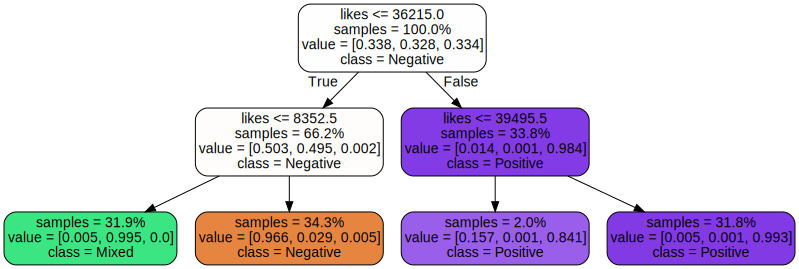

In [83]:
dot_data = tree.export_graphviz(Tree, out_file=None, feature_names=attributes.columns, class_names=['Negative', 'Mixed', 'Positive'], proportion=True, impurity=False, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('Video Feedback')
graph